In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,58,F,177,86.6,104,91,3,1,0,1,1,1
1,71,M,160,71.6,100,76,1,1,0,0,1,1
2,48,F,192,84.6,109,79,3,1,0,0,1,0
3,34,F,177,60.4,134,64,1,3,0,0,1,0
4,62,F,176,74.0,124,75,1,1,0,0,0,0


In [4]:
df['gender'] = df['gender'].map({'M':1,'F':0})

In [5]:
df_BMI = (df['weight'])/((df['height']/100)**2)
df['overweight'] = np.where(df_BMI > 25,1,0)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,58,0,177,86.6,104,91,3,1,0,1,1,1,1
1,71,1,160,71.6,100,76,1,1,0,0,1,1,1
2,48,0,192,84.6,109,79,3,1,0,0,1,0,0
3,34,0,177,60.4,134,64,1,3,0,0,1,0,0
4,62,0,176,74.0,124,75,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,21,1,142,54.0,109,76,1,1,0,0,0,1,1
9996,30,1,163,63.1,115,72,1,1,0,0,1,1,0
9997,58,0,168,50.8,131,87,1,1,0,0,0,0,0
9998,53,0,165,57.0,74,64,1,1,0,0,1,0,0


In [6]:
df['cholesterol'] = np.where(df['cholesterol']>1,1,0)
df['gluc'] = np.where(df['gluc']>1,1,0)

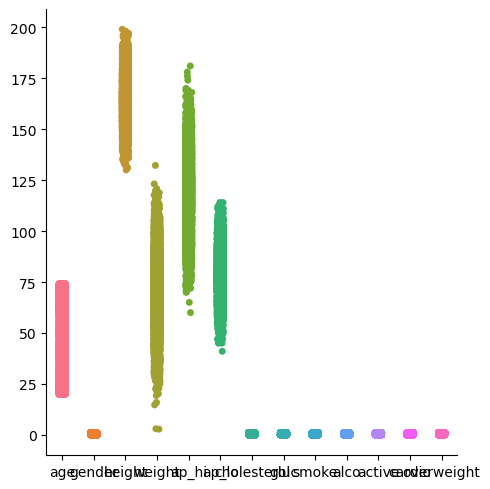

In [7]:
print(sns.catplot(df))

In [8]:
def draw_cat_plot():
    df_cat = pd.melt(df,id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco','active', 'overweight'])
    
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    fig = sns.catplot(
        data=df_cat, 
        x='variable', 
        y='total', 
        hue='value', 
        col='cardio', 
        kind='bar'
    ).fig


In [9]:
def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi'])&
        (df['height'] >= df['height'].quantile(0.025))&
        (df['height'] <= df['height'].quantile(0.975))&
        (df['weight'] >=df['weight'].quantile(0.025))&
        (df['weight'] <=df['weight'].quantile(0.0975))
     ]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(12, 12))

    sns.heatmap(
        corr,
        mask=mask, 
        annot=True, 
        fmt='.1f', 
        center=0, 
        vmax=0.3, 
        square=True, 
        linewidths=.5, 
        cbar_kws={"shrink": .5},
        ax=ax
    )
    fig.savefig('heatmap.png')
    return fig

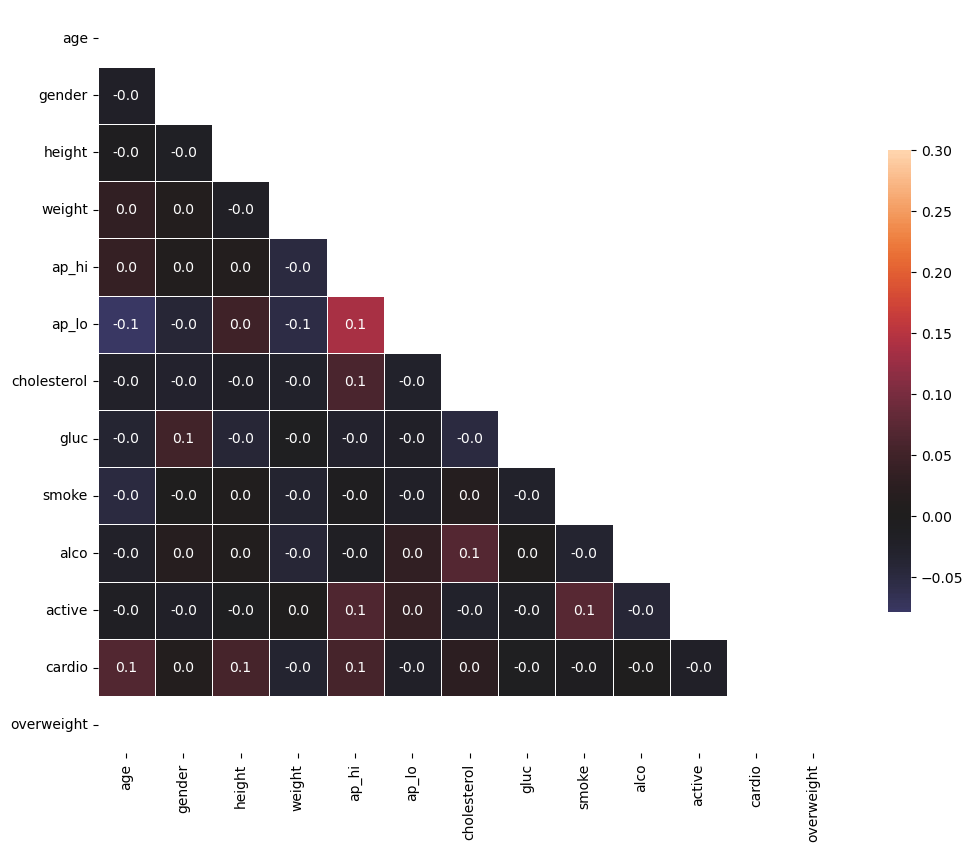

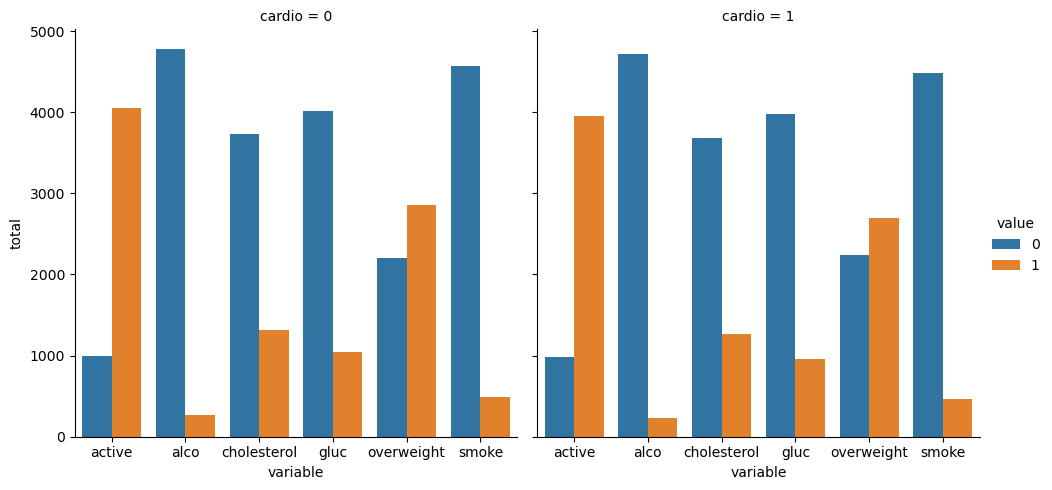

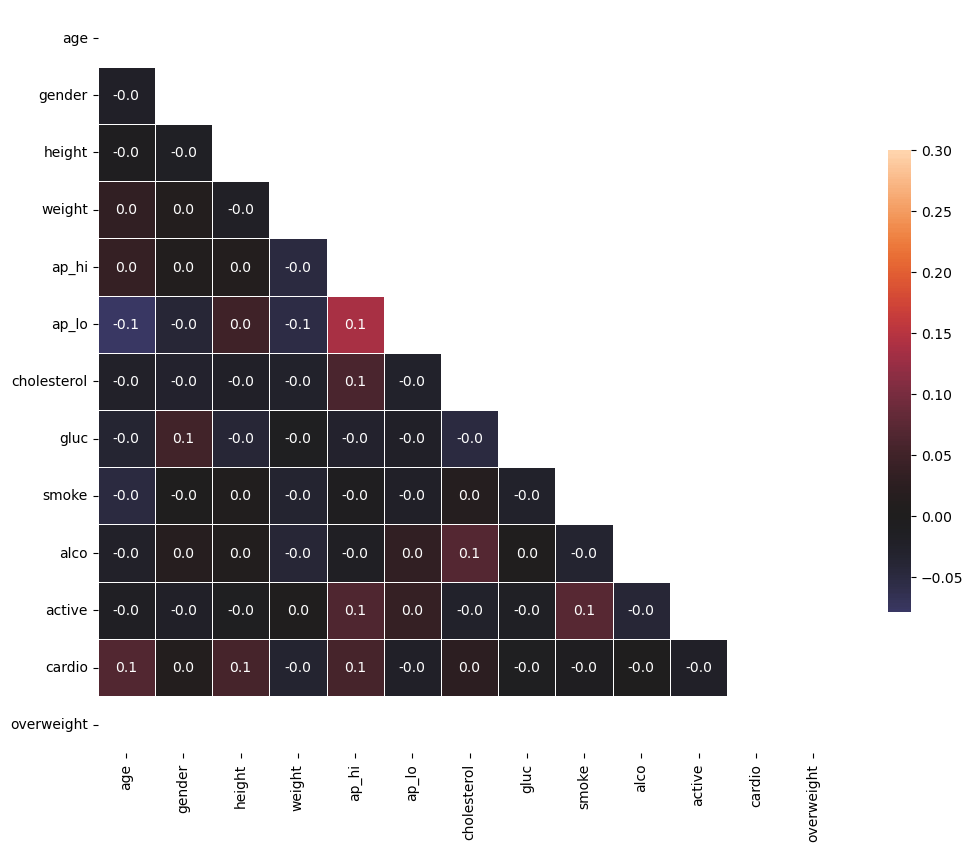

In [10]:
draw_cat_plot()
draw_heat_map()